In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
dataset = pd.read_csv("world bank.csv")
dataset.head(3)

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,2014,12.259,7.219,2309.37,1.322820e+10,4578.67,60.100,8.9,77.813,105.442,17.490
1,2013,12.257,7.096,2533.25,1.277630e+10,4413.08,57.200,9.5,77.554,105.660,15.866
2,2012,12.197,6.996,2118.33,1.231980e+10,4247.61,54.656,10.2,77.252,105.854,13.376


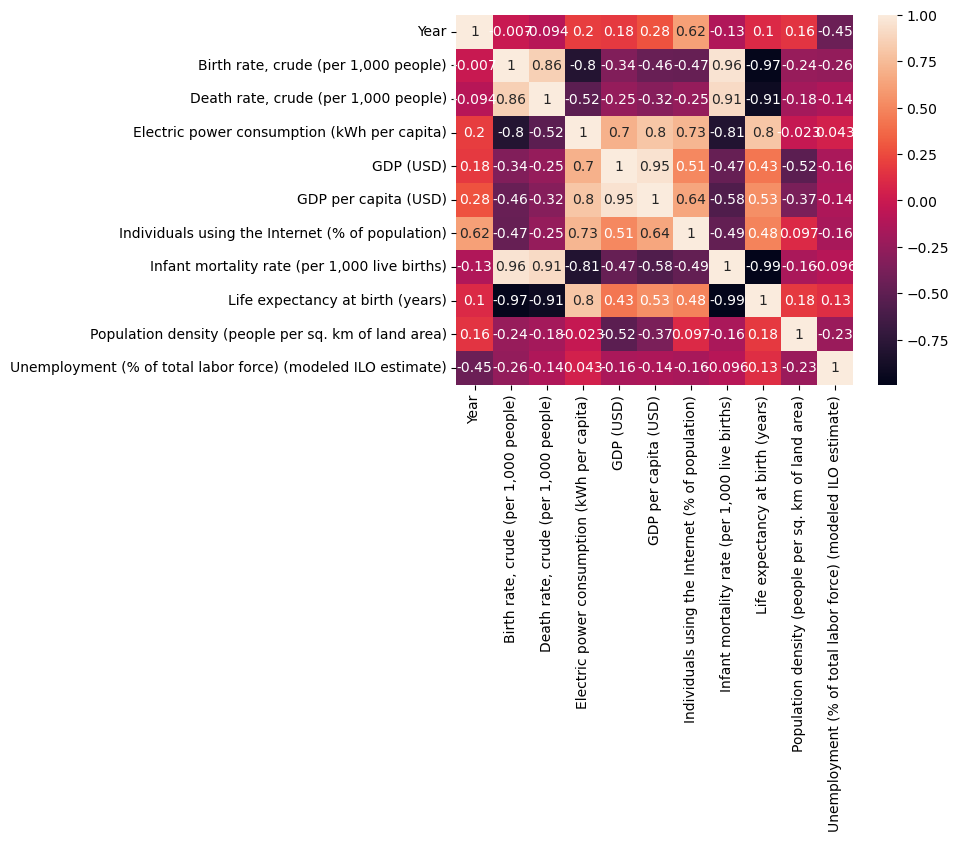

In [49]:
sns.heatmap(data= dataset.corr() , annot=True)
plt.show()

In [50]:
x = dataset.iloc[:,:-1]
y = dataset["Unemployment (% of total labor force) (modeled ILO estimate)"]

In [51]:
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [52]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge

In [76]:
from sklearn.metrics import mean_absolute_error ,  mean_squared_error 
import numpy as np

In [77]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [78]:
lr.score(x_test , y_test)*100

62.62494701183818

In [88]:
mean_squared_error(y_test , lr.predict(x_test))


17.750461628577703

In [87]:
mean_absolute_error(y_test , lr.predict(x_test))

3.4639903582383456

In [89]:
np.sqrt(mean_squared_error(y_test , lr.predict(x_test))
)

4.2131296714648725

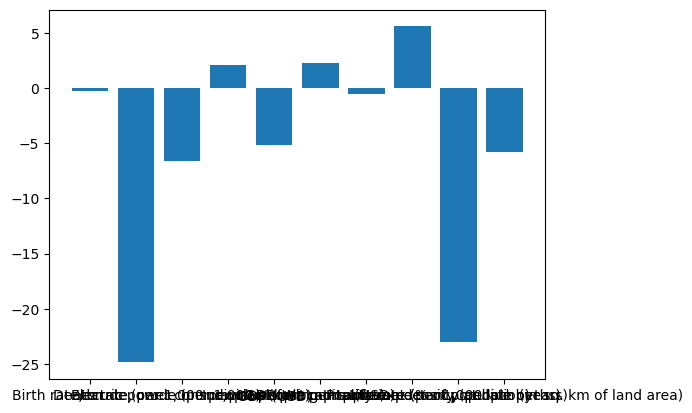

In [79]:

plt.bar(x.columns,lr.coef_)
plt.show()

#lasso

In [80]:
la = Lasso(alpha=0.1)
la.fit(x_train , y_train)
la.score(x_test , y_test)*100

61.446242107324046

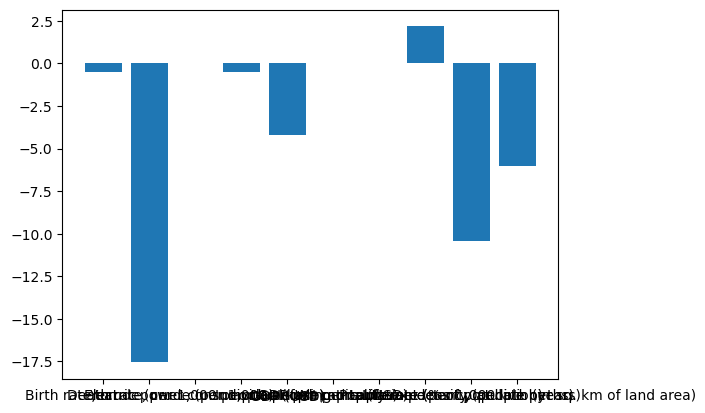

In [81]:
plt.bar(x.columns,la.coef_)
plt.show()

In [91]:
print(mean_squared_error(y_test , la.predict(x_test)))
print(mean_absolute_error(y_test , la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , la.predict(x_test))
))

18.31026166914545
3.4861632286628756
4.279049154794258


In [82]:
ri = Ridge(alpha=0.1)
ri.fit(x_train , y_train)

Ridge(alpha=0.1)

In [83]:
ri.score(x_test,y_test)*100

62.98488532519245

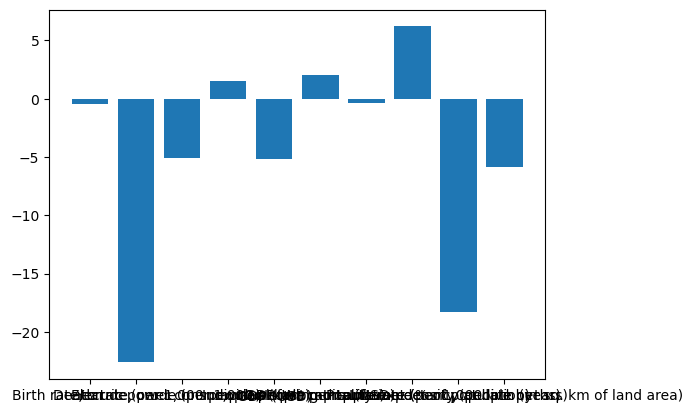

In [84]:
plt.bar(x.columns,ri.coef_)
plt.show()

In [92]:
print(mean_squared_error(y_test , ri.predict(x_test)))
print(mean_absolute_error(y_test , ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test , ri.predict(x_test))
))

17.579516821573055
3.389259362844451
4.192793438934603
